In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv("Train_Dataset-01.csv")
ds1 = pd.read_csv("Test_Dataset-01.csv")

In [3]:
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,NaN,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
ds.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
ds.drop(["id"],axis=1,inplace=True)
ds.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,NaN,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
ds_null=ds.columns[ds.isnull().any()]
ds[ds_null].isnull().sum()

texture_mean               12
smoothness_mean             1
compactness_mean            6
symmetry_mean               1
fractal_dimension_mean      2
radius_se                  14
smoothness_se               3
compactness_se              2
concavity_se                1
concave points_se           1
symmetry_se                 1
fractal_dimension_se       13
perimeter_worst             1
area_worst                 13
smoothness_worst            3
concavity_worst             6
concave points_worst        5
symmetry_worst              5
fractal_dimension_worst     3
dtype: int64

In [7]:
ds["texture_mean"].fillna(method='ffill',inplace=True)
ds["smoothness_mean"].fillna(method='ffill',inplace=True)
ds["compactness_mean"].fillna(method='ffill',inplace=True)
ds["symmetry_mean"].fillna(method='ffill',inplace=True)
ds["fractal_dimension_mean"].fillna(method='ffill',inplace=True)
ds["radius_se"].fillna(method='ffill',inplace=True)
ds["smoothness_se"].fillna(method='ffill',inplace=True)
ds["compactness_se"].fillna(method='ffill',inplace=True)
ds["concavity_se"].fillna(method='ffill',inplace=True)
ds["concave points_se"].fillna(method='ffill',inplace=True)
ds["symmetry_se"].fillna(method='ffill',inplace=True)
ds["fractal_dimension_se"].fillna(method='ffill',inplace=True)
ds["perimeter_worst"].fillna(method='ffill',inplace=True)
ds["area_worst"].fillna(method='ffill',inplace=True)
ds["smoothness_worst"].fillna(method='ffill',inplace=True)
ds["concavity_worst"].fillna(method='ffill',inplace=True)
ds["concave points_worst"].fillna(method='ffill',inplace=True)
ds["symmetry_worst"].fillna(method='ffill',inplace=True)
ds["fractal_dimension_worst"].fillna(method='ffill',inplace=True)

In [8]:
ds.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [9]:
ds_categ = list(ds.select_dtypes(exclude = ["number"]).columns)
ds_categ

['diagnosis']

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ds_categ:
    print(ds[i].unique())
    ds[i] = le.fit_transform(ds[i])

['M' 'B']


In [11]:
ds.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.14250,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
X = ds.iloc[:377,0:30]
y = ds.iloc[:377,[0]]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2=MinMaxScaler()
X_train = scaler.fit_transform(X)
y = np.reshape(np.array(y), (-1,1))
y_train = scaler2.fit_transform(y)

In [14]:
X.shape

(377, 30)

In [15]:
y.shape

(377, 1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)

In [17]:
X_train.shape

(301, 30)

In [18]:
y_train.shape

(301, 1)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log1=LogisticRegression()

In [21]:
log1.fit(X_train,y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
prediction=log1.predict(X_test)

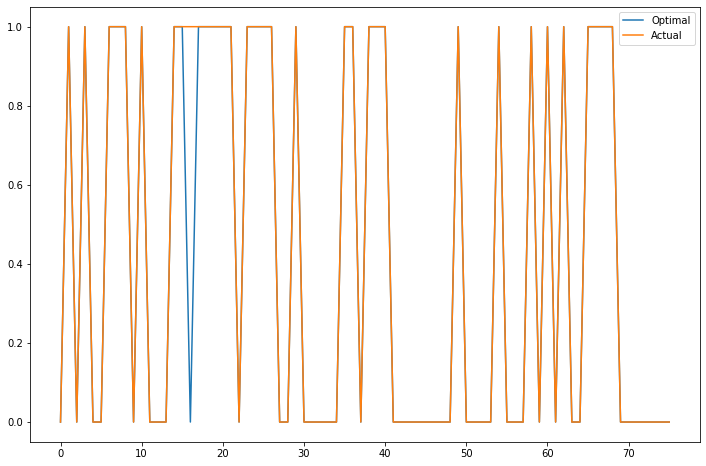

In [23]:
fig = plt.figure(figsize = (12,8))
plt.plot(prediction[:100], label = 'Optimal')
plt.plot(y_test[:100], label = 'Actual')
plt.legend()

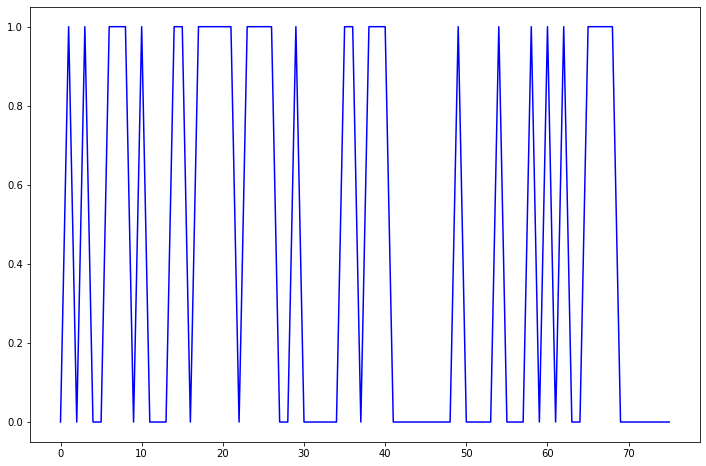

In [24]:
fig=plt.figure(figsize=(12,8))
plt.plot(prediction[:100], label='Optimal',color='b')
plt.show()

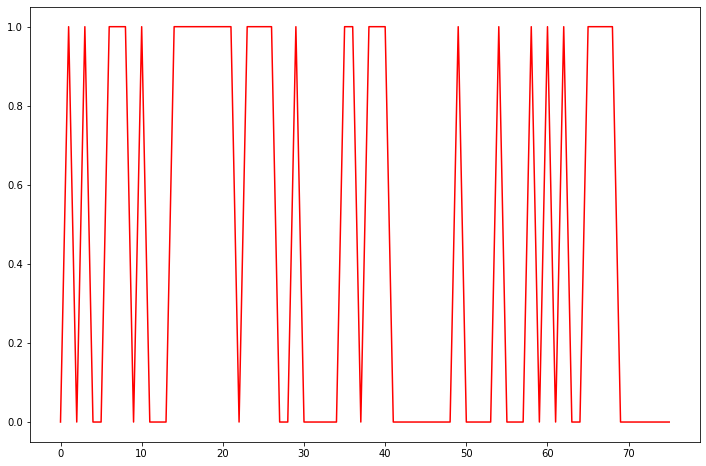

In [25]:
fig=plt.figure(figsize=(12,8))
plt.plot(y_test[:100], label='Actual',color='r')
plt.show()

In [26]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print(classification_report(y_test,prediction))

print("Accuracy = ",accuracy_score(y_test,prediction))

print("Auc = ",roc_auc_score(y_test,prediction))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.97      0.98        33

    accuracy                           0.99        76
   macro avg       0.99      0.98      0.99        76
weighted avg       0.99      0.99      0.99        76

Accuracy =  0.9868421052631579
Auc =  0.9848484848484849


In [27]:
ds1.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,9013579,13.46,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,...,14.69,35.63,97.11,680.6,0.1108,0.1457,0.07934,0.05781,0.2694,0.07061
1,9013594,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.25690,0.10540,0.3387,0.09638
2,9013838,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.84020,0.25240,0.4154,0.14030
3,901549,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
4,901836,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287


In [28]:
ds1.drop(["id"],axis=1,inplace=True)
ds1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.46,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,...,14.69,35.63,97.11,680.6,0.1108,0.1457,0.07934,0.05781,0.2694,0.07061
1,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.25690,0.10540,0.3387,0.09638
2,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.84020,0.25240,0.4154,0.14030
3,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,0.06914,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
4,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287


In [29]:
ds1_null=ds1.columns[ds1.isnull().any()]
ds1[ds1_null].isnull().sum()

Series([], dtype: float64)

In [30]:
ds.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [31]:
ds.shape

(377, 31)

In [32]:
ds1.shape

(192, 30)

In [33]:
X = ds.iloc[:377,0:30]
y = ds.iloc[:377,[0]]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2=MinMaxScaler()
X_train = scaler.fit_transform(X)
y = np.reshape(np.array(y), (-1,1))
y_train = scaler2.fit_transform(y)

In [34]:
X_train.shape

(377, 30)

In [35]:
y_train.shape

(377, 1)

In [36]:
A = ds1.iloc[:192,0:30]

In [37]:
scaler = MinMaxScaler()
X_test = scaler.fit_transform(A)

In [38]:
X_test.shape

(192, 30)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log=LogisticRegression()
log.fit(X_train,y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions = log.predict(X_test)

In [42]:
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0.])

In [43]:
temp=predictions.reshape(-1,1)
temp=scaler2.inverse_transform(temp)
temp

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [44]:
y=pd.DataFrame(temp)
y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
187,1.0
188,1.0
189,1.0
190,1.0


In [45]:
ds2 = pd.read_csv("Test_Dataset-01.csv")

In [46]:
testpplid=ds2.iloc[:,0].values

In [47]:
import xlsxwriter 
  
workbook = xlsxwriter.Workbook('l1.xlsx') 
worksheet = workbook.add_worksheet() 
  
row = 1
row_id=0
column_id = 0
column=1
worksheet.write(0,0,'id')
worksheet.write(0,1,'diagnosis')
  
for i in range(len(temp)) : 
  
    
    worksheet.write(row, column_id, testpplid[i])
    worksheet.write(row, column, temp[i]) 
    
    row += 1
      
workbook.close() 